##### This project aims to automate loan approval processes of Financial Institutions they by reducing turn around time for loan requests, removing biases etc.

##### We will follow the following steps to achieve this;
    -- Loading and exploring the data
    -- Dropping unecessary columns
    -- Working with missing values
    -- Visualization
    -- Encoding the categorical data
    -- Model Development
        -- Splitting the data into test/train
        -- Using GaussianNB
        -- Loss function
        -- Using SVC with Grid Search CV
        -- XGBoost classifier
        -- Decision Tree using randomized search
        -- Random forest using randomized search
    -- Selecting and saving the model
    -- Deployment


Start by importing dependencies

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load our dataset from our local machine

In [63]:

import pandas as pd
df = pd.read_csv(r'C:\Users\affuy\Documents\LHL\Data_Sets\train_u6lujuX_CVtuZ9i (1).csv')

View first few rows to understand the dataset 

In [64]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
df.shape

(614, 13)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [67]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Let's check for null values in the dataset

In [68]:
def missing_values(dataset):
    a = num_null_values = dataset.isnull().sum()
    return a
missing_values(df)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Our dataset has null values so we have to handle them. We will start with handling categorical values.
##### We will start by dropping the loan ID and dependents columns because we do not require them for the model as they have no influence over if a loan is approved or not.

In [69]:
df.drop('Loan_ID', axis=1, inplace=True)

# View data after dropping unwanted columns
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [70]:
# Let's view categorical columns with null values
cols = df[['Gender', 'Married', 'Self_Employed', 'Dependents']]
for i in cols:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)

We have replaced the null values of the categorical columns with the mode of the respective columns. Let's view our dataset again

In [71]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Next we with deal with missing data of the numerical data

In [72]:
n_cols = df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
for i in n_cols:
    df[i].fillna(df[i].mean(), inplace=True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [73]:
# Lets view information about our analysed data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


#### Let us now encode our categorical features before applying SMOTE to balance all imbalanced features. We will use both ordinal and one-hot encoding to achieve this since some of the categorical features have non-binary classes. First we use ordinal encoding for the dependents column since its a non-binary class.

In [74]:
# Mapping ordinal values for the 'Dependents' feature
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}

# Apply the mapping to the 'Dependents' column
df['Dependents'] = df['Dependents'].map(dependents_mapping)

#### Next we use one-hot encoding for the categorical columns

In [75]:
# One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'], drop_first=True)

In [76]:
# View the full encoded dataset
# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

#### Next we will define a function to view the count of the classes of each category

In [77]:
# Create function to view classification of the categorical features
def get_categorical_counts(dataframe, column_name):
    """
    Get the value counts of a categorical column in a DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the categorical column.

    Returns:
    - pd.Series: The value counts of the specified column.
    """
    # Check if the column is categorical
    if dataframe[column_name].dtype == 'O':
        # Display the count of each category in the specified column
        counts = dataframe[column_name].value_counts()
        return counts
    else:
        return f"The specified column '{column_name}' is not categorical."

# Example usage:
gender_counts = get_categorical_counts(df, 'Gender')
married_counts = get_categorical_counts(df, 'Married')
dependents_counts = get_categorical_counts(df, 'Dependents')
education_counts = get_categorical_counts(df, 'Education')
self_employed_counts = get_categorical_counts(df, 'Self_Employed')
property_area_counts = get_categorical_counts(df, 'Property_Area')
loan_status_counts = get_categorical_counts(df, 'Loan_Status')

# Display the results
print("Gender counts:")
print(gender_counts)

print("\nMarital Status counts:")
print(married_counts)

print("\nDependents Status counts:")
print(dependents_counts)

print("\nEducation Status counts:")
print(education_counts)

print("\nSelf Employed Status counts:")
print(self_employed_counts)

print("\nProperty Area counts:")
print(property_area_counts)

print("\nLoan Status counts:")
print(loan_status_counts)


Gender counts:
Male      502
Female    112
Name: Gender, dtype: int64

Marital Status counts:
Yes    401
No     213
Name: Married, dtype: int64

Dependents Status counts:
The specified column 'Dependents' is not categorical.

Education Status counts:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self Employed Status counts:
No     532
Yes     82
Name: Self_Employed, dtype: int64

Property Area counts:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan Status counts:
Y    422
N    192
Name: Loan_Status, dtype: int64


##### It is clear that there is a significant imbalance within most of our features which may affect how our data performs with unseen data. We will use a method called SMOTE which stands for Synthetic Minority Over-sampling Technique to address class imbalance in classification tasks.

In [78]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your encoded DataFrame is named 'df_encoded'
X = df_encoded.drop('Loan_Status_Y', axis=1)  # Features
y = df_encoded['Loan_Status_Y']  # Target variable

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the first few rows of the resampled DataFrame
print(df_resampled.head())


   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

### Lets see our encoded data before and after applying SMOTE to ensure its now balanced

In [79]:
def view_balance_before_after_smote_categorical(df_before, df_after):
    """
    View the class distribution of each categorical feature/column before and after applying SMOTE.

    Parameters:
    - df_before: pd.DataFrame
        The original DataFrame before applying SMOTE.
    - df_after: pd.DataFrame
        The DataFrame after applying SMOTE.

    Returns:
    - balance_info_before: pd.DataFrame
        DataFrame containing the counts of each class in each categorical feature/column before SMOTE.
    - balance_info_after: pd.DataFrame
        DataFrame containing the counts of each class in each categorical feature/column after SMOTE.
    """
    categorical_columns = df_before.select_dtypes(include=['object', 'uint8']).columns
    balance_info_before = df_before[categorical_columns].apply(lambda x: x.value_counts()).T
    balance_info_after = df_after[categorical_columns].apply(lambda x: x.value_counts()).T

    return balance_info_before, balance_info_after

# Example usage
balance_before_categorical, balance_after_categorical = view_balance_before_after_smote_categorical(df_encoded, df_resampled)
print("Class distribution for each categorical feature before SMOTE:")
print(balance_before_categorical)
print("\nClass distribution for each categorical feature after SMOTE:")
print(balance_after_categorical)


Class distribution for each categorical feature before SMOTE:
                           0    1
Gender_Male              112  502
Married_Yes              213  401
Education_Not Graduate   480  134
Self_Employed_Yes        532   82
Property_Area_Semiurban  381  233
Property_Area_Urban      412  202
Loan_Status_Y            192  422

Class distribution for each categorical feature after SMOTE:
                           0    1
Gender_Male              196  648
Married_Yes              359  485
Education_Not Graduate   681  163
Self_Employed_Yes        757   87
Property_Area_Semiurban  596  248
Property_Area_Urban      611  233
Loan_Status_Y            422  422


#### VISUALIZATION
This task is a classification problem because it involves predicting a discrete output variable, specifically the 'Loan_Status,' which appears to be a binary variable with values 0 and 1. In classification problems, the goal is to assign input data points to predefined categories or classes. 

In this scenario, the objective is to categorize loan applications into either approved (1) or declined (0) based on various input features such as 'Gender,' 'Married,' 'Education,' and others. The nature of the 'Loan_Status' variable, representing distinct classes indicating loan approval outcomes, aligns with the characteristics of a classification problem, where the aim is to build a model that can learn and generalize patterns from historical data to make predictions on new, unseen instances.

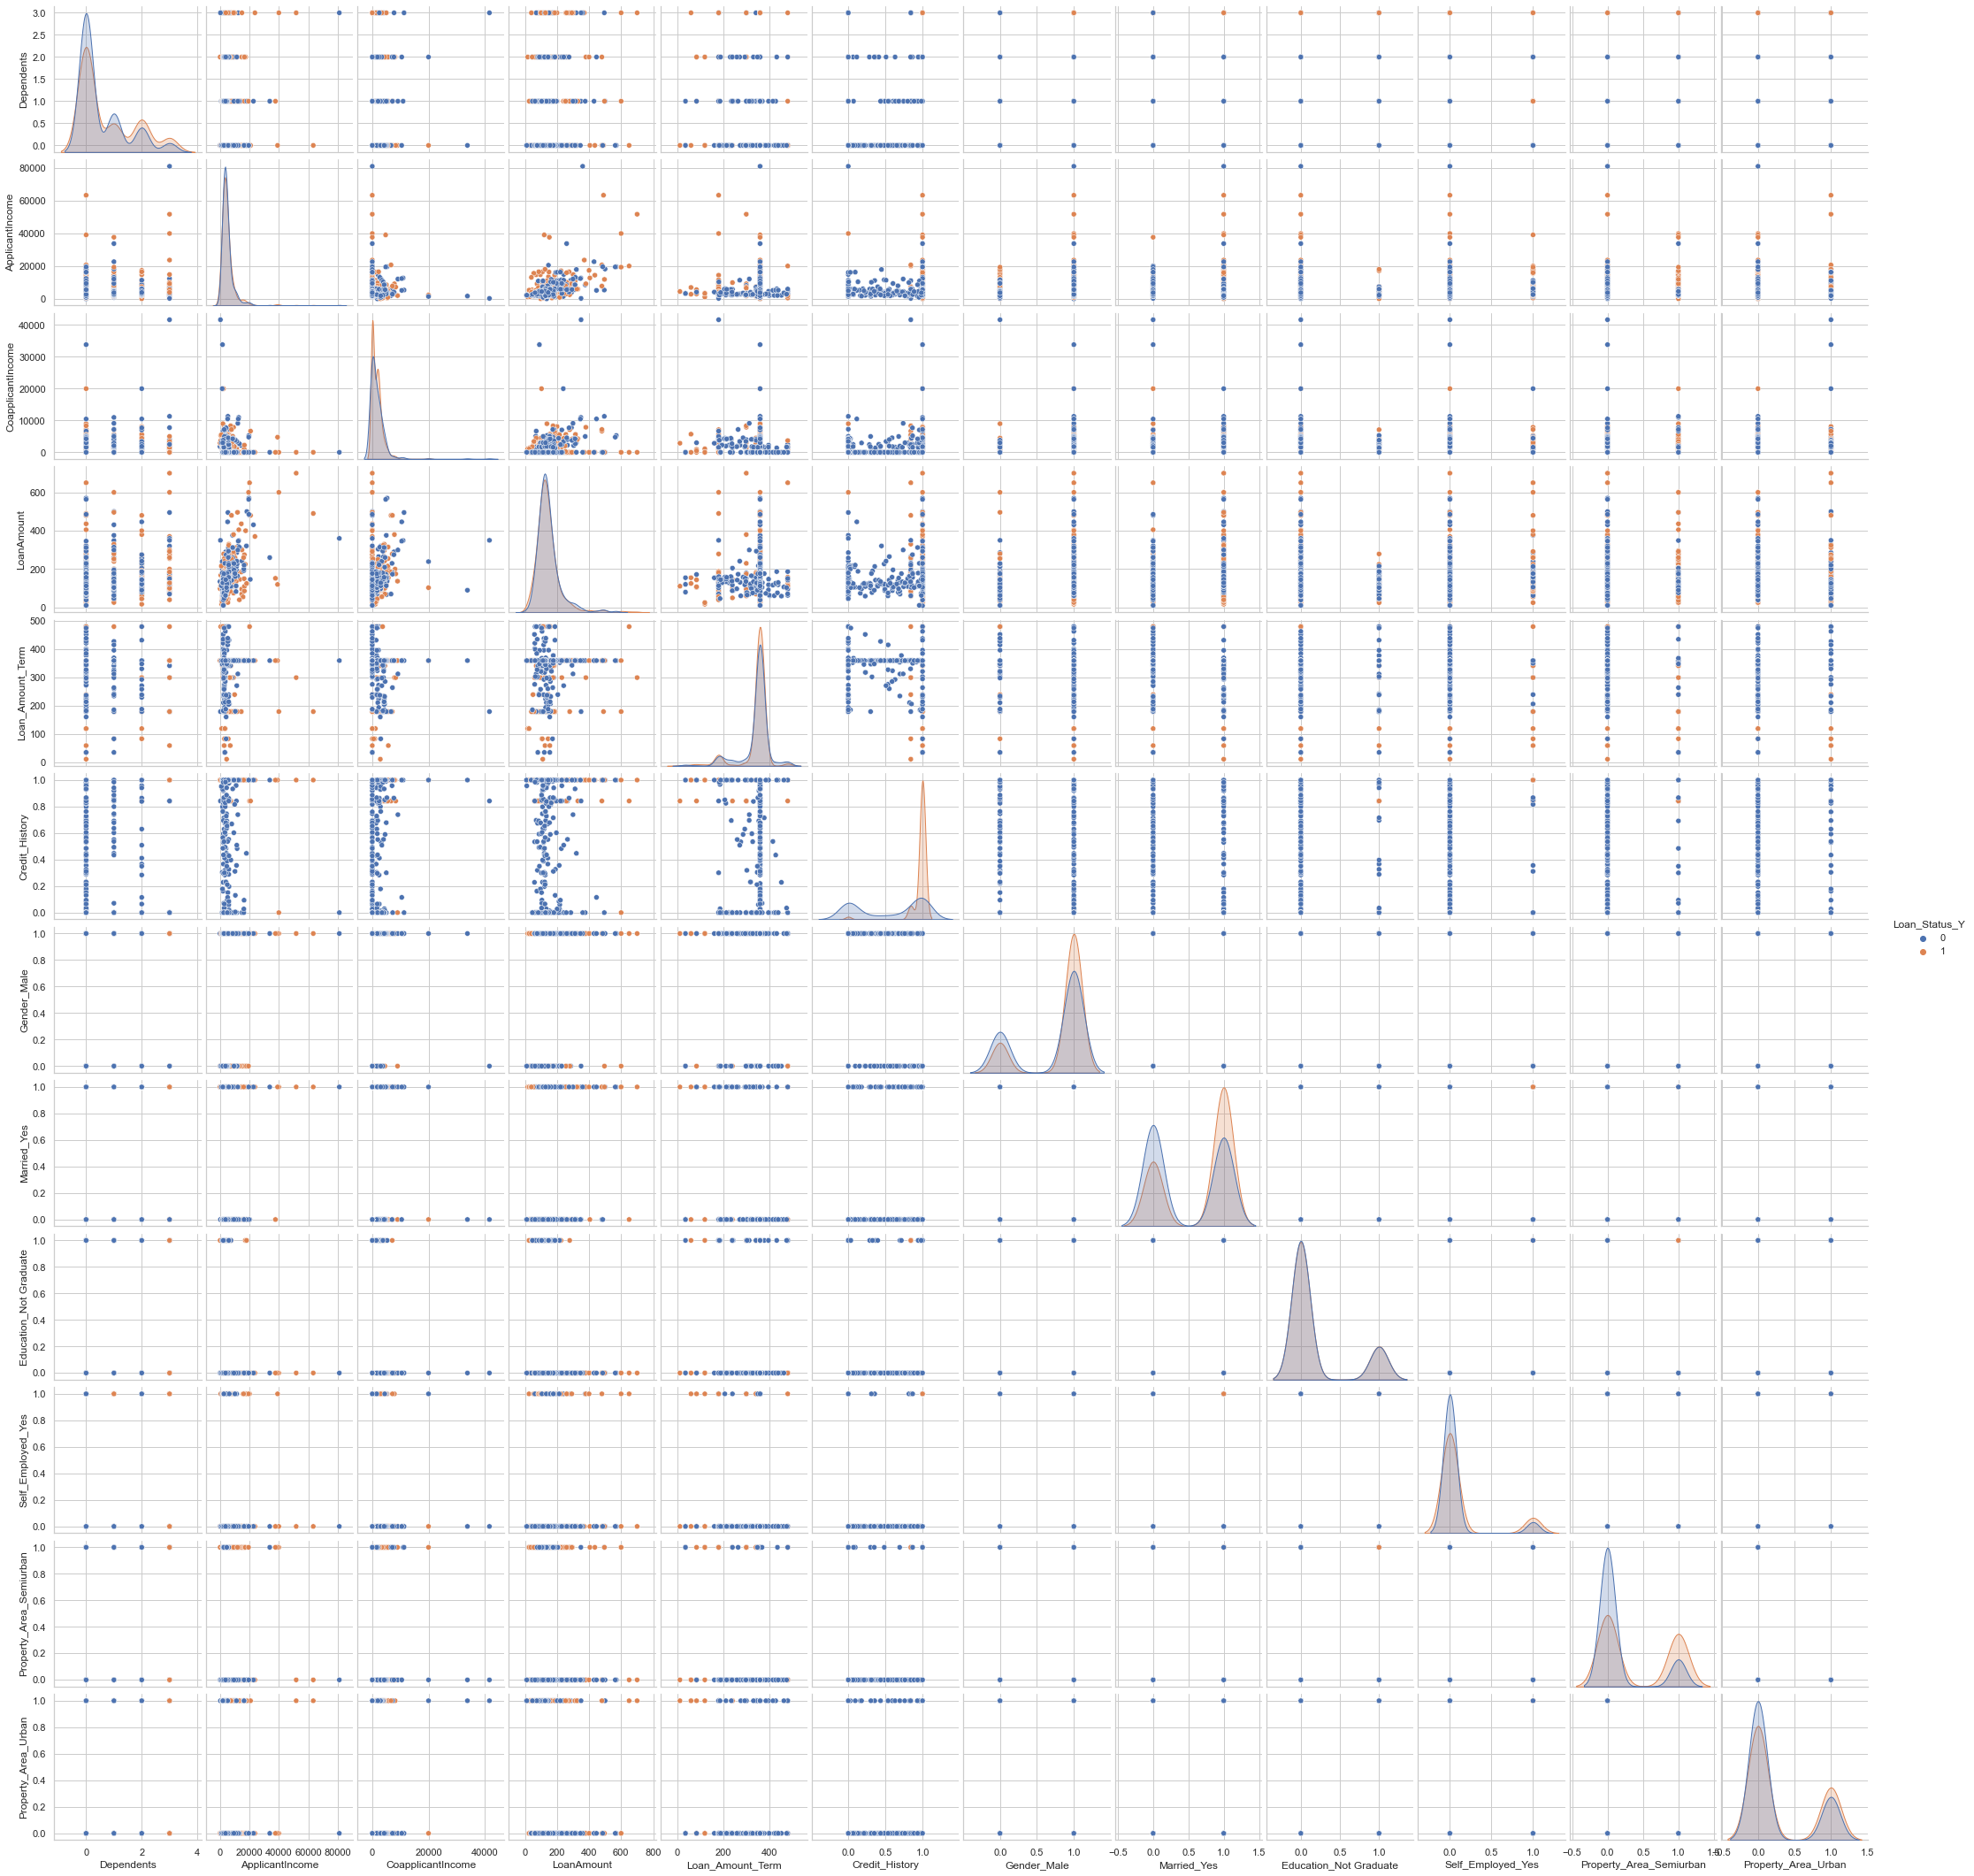

In [80]:
# Visualize relationships between predictor variables and the outcome variable
sns.pairplot(df_resampled, hue='Loan_Status_Y', diag_kind='kde')
plt.show()

The above pairplot does not really show the relationships between feature pairs so we will use the correlation matrix to get a clearer idea. 

Exploring feature relationships in your loan approval project is not only beneficial for data analysis and interpretability but also plays a crucial role in guiding the choice of the machine learning algorithm. 

Understanding the relationships between features helps in assessing whether the assumptions of certain algorithms, such as independence between features, hold true for your dataset. For instance, if features are highly correlated, linear models like logistic regression may be influenced, and alternative models such as decision trees or ensemble methods might be considered. 

Moreover, identifying which features are more influential in predicting 'Loan_Status' can guide the selection of algorithms that handle feature importance differently. This thorough exploration of feature relationships contributes not only to the reliability of your predictive model but also to the strategic choice of a machine learning algorithm that aligns with the characteristics of your dataset and the goals of the loan approval project.


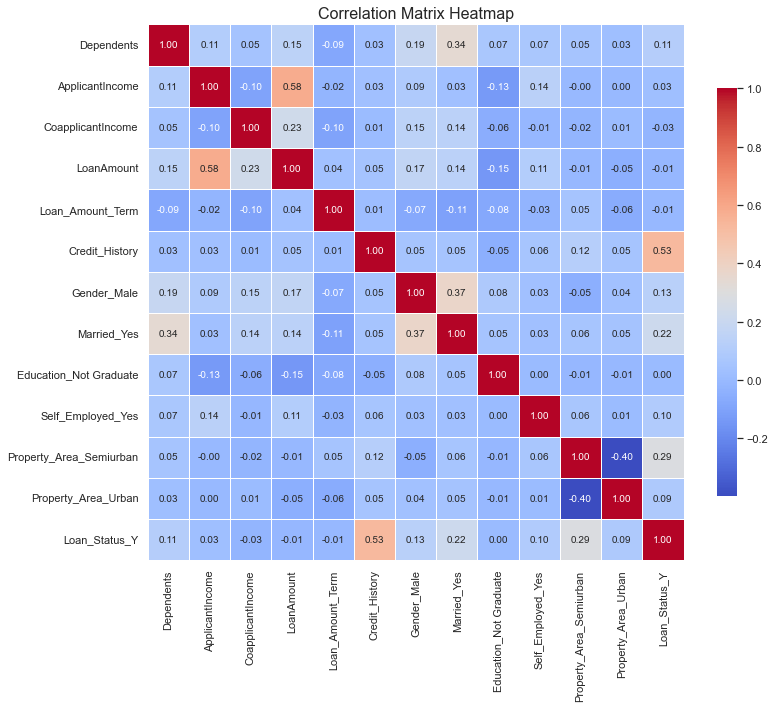

In [81]:
# Display the correlation matrix
# Set the size of the plot
plt.figure(figsize=(12, 10))
# Create a correlation matrix
correlation_matrix = df_resampled.corr()

# Customize the heatmap for better aesthetics
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": 0.75})

# Set the title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()

#### Given the outcome of the correlation matrix, which indicates limited correlation between features, particularly with only 'LoanAmount' and 'ApplicantIncome' showing a fair degree of correlation, linear models might not be the most suitable choice. Linear models, such as Gaussian Naive Bayes (GaussianNB) and Support Vector Classifier (SVC), assume linear relationships between features and the target variable. However, the lack of strong correlations suggests that the relationships may be more complex.

We will use a bar chart to visualize the number of approved and Declined loans.

### Categorical Variable Distribution Visualization

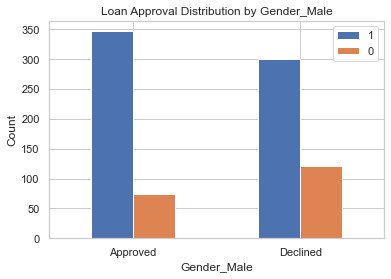

In [82]:
import pandas as pd

# Assuming your DataFrame is named 'df_encoded'
def bar_chart(col):
    """
    Generate a bar chart to visualize the distribution of a categorical variable
    based on loan approval status.

    Parameters:
    - col: str
        The name of the categorical column for which the bar chart is generated.

    Usage:
    bar_chart('ColumnName')

    Example:
    bar_chart('Property_Area')
    """
    # Filter data for approved and declined loan status
    approved = df_resampled[df_resampled['Loan_Status_Y'] == 1][col].value_counts()
    declined = df_resampled[df_resampled['Loan_Status_Y'] == 0][col].value_counts()
    
    # Create a DataFrame for visualization
    df1 = pd.DataFrame([approved, declined])
    df1.index = ['Approved', 'Declined']
    
    # Plot a bar chart with title
    ax = df1.plot(kind='bar', rot=0, title=f'Loan Approval Distribution by {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Example usage
bar_chart('Gender_Male')


### We notice that males have a higher number of approved loans and also larger number of declined loans. So lets view the percentage of male and female in the dataset.

In [83]:
def calculate_percentage(df, col):
    """
    Calculate and display the percentage of each category in a given column.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - col: str
        The name of the column for which to calculate percentages.

    Returns:
    None
    """

    # Calculate the total count for each category
    category_counts = df_resampled[col].value_counts()

    # Calculate the total number of entries (excluding missing values)
    total_entries = category_counts.sum()

    # Calculate and display the percentage for each category
    for category in category_counts.index:
        percentage = (category_counts[category] / total_entries) * 100
        print(f"Percentage of {category}: {percentage:.2f}%")

# Example usage
calculate_percentage(df_resampled, 'Gender_Male')

Percentage of 1: 76.78%
Percentage of 0: 23.22%


### Lets look at Married column('Married_Yes')

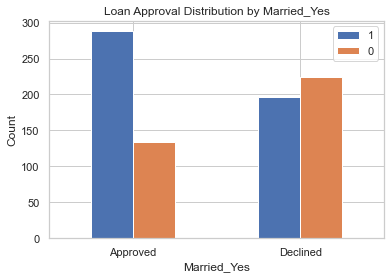

In [84]:
bar_chart('Married_Yes')

#### We also see that 'Married'people have a higher loan approval than unmarried ones. Again we view the representation of both married and unmarried

In [85]:
calculate_percentage(df, 'Married_Yes')

Percentage of 1: 57.46%
Percentage of 0: 42.54%


The number of married people represented in the dataset is now almost evenly split. Let's look a 'Education' next.

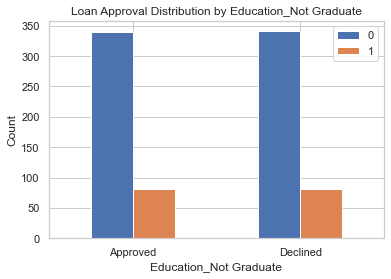

In [86]:
bar_chart('Education_Not Graduate')

#### More loans are approved for Graduates over people that did not graduate and the same applies to loans declined. Again lets see how they're represented in our dataset.

In [87]:
calculate_percentage(df_resampled, 'Education_Not Graduate')

Percentage of 0: 80.69%
Percentage of 1: 19.31%


#### And again, we have more graduates represented in our dataset. Lastly we check for 'Self_Employed' people.

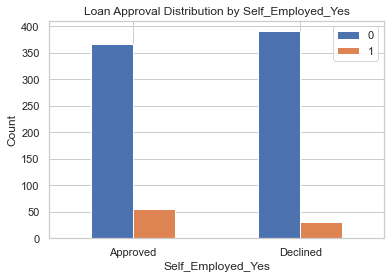

In [88]:
bar_chart('Self_Employed_Yes')

#### We can see that more loans are approved and declined for people that are not Self_Employed.

In [89]:
calculate_percentage(df_resampled, 'Self_Employed_Yes')

Percentage of 0: 89.69%
Percentage of 1: 10.31%


### Preprocessing

#### Let us create some additional columns from our existing features that will help our model's generalization to new unseen data. 

Total Income Feature

In [90]:
# The 'Total_Income' feature combines the individual incomes of the applicant and co-applicant, providing a holistic view of the household's financial capacity.
df_resampled['Total_Income'] = df_resampled['ApplicantIncome'] + df_resampled['CoapplicantIncome']

In [91]:
# Loan Amount to Total Income Ratio Feature
df_resampled['LoanAmount_to_TotalIncome_Ratio'] = df_resampled['LoanAmount'] / df_resampled['Total_Income']

# Description: The 'LoanAmount_to_TotalIncome_Ratio' feature represents the ratio of the loan amount to the total income, 
# offering insights into the borrower's ability to manage repayments relative to their overall income.

In [92]:
# Loan Term Multiplier Feature
df_resampled['LoanTerm_Multiplier'] = df_resampled['Loan_Amount_Term'] * df_resampled['LoanAmount']

# Description: The 'LoanTerm_Multiplier' feature multiplies the loan amount by the loan term, 
# providing a measure of the total amount repayable over the loan term, capturing the overall financial commitment.

In [93]:
# Display the updated DataFrame with new features
print(df_resampled.head())

   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0  146.412162   
1           1             4583             1508.0  128.000000   
2           0             3000                0.0   66.000000   
3           0             2583             2358.0  120.000000   
4           0             6000                0.0  141.000000   

   Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  \
0             360.0             1.0            1            0   
1             360.0             1.0            1            1   
2             360.0             1.0            1            1   
3             360.0             1.0            1            1   
4             360.0             1.0            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                       0                  0                        0   
1                       0                  0                        0   

In [94]:
print(df_resampled.isnull().sum())

Dependents                         0
ApplicantIncome                    0
CoapplicantIncome                  0
LoanAmount                         0
Loan_Amount_Term                   0
Credit_History                     0
Gender_Male                        0
Married_Yes                        0
Education_Not Graduate             0
Self_Employed_Yes                  0
Property_Area_Semiurban            0
Property_Area_Urban                0
Loan_Status_Y                      0
Total_Income                       0
LoanAmount_to_TotalIncome_Ratio    0
LoanTerm_Multiplier                0
dtype: int64


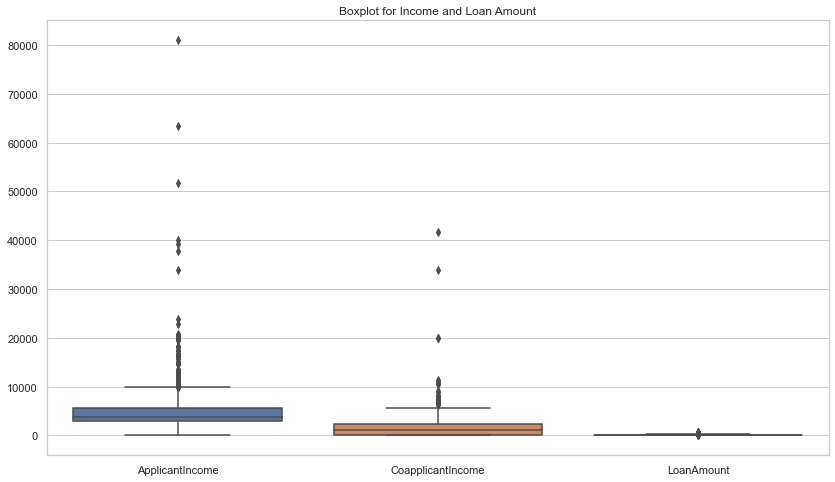

In [95]:
##### Let's begin by checking if there are outlier in our dataset
# Checking for outliers using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_resampled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount')
plt.show()

These features posses a lot of outliers and we must address them by capping them within range to the 95th percentile

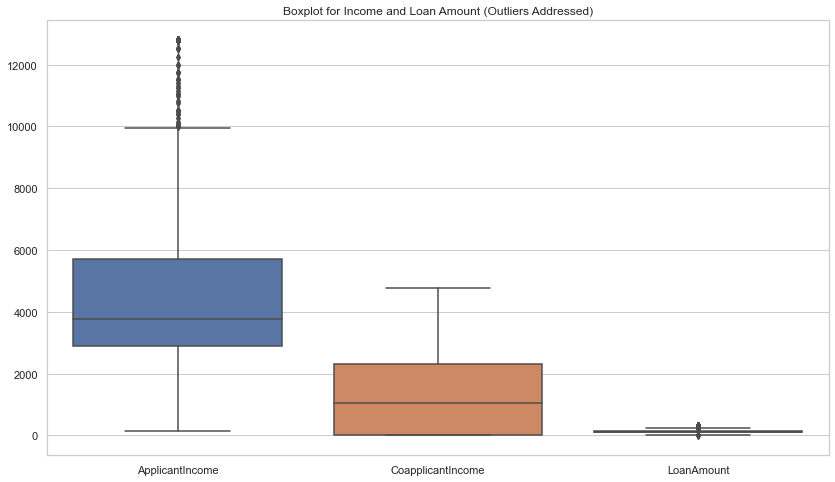

In [96]:
# Addressing outliers by capping values at the 95th percentile
columns_to_cap = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in columns_to_cap:
    percentile_95 = df_resampled[col].quantile(0.95)
    df_resampled[col] = np.where(df_resampled[col] > percentile_95, percentile_95, df_resampled[col])
# Display updated box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_resampled[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']])
plt.title('Boxplot for Income and Loan Amount (Outliers Addressed)')
plt.show()


Now the outliers have been handled. Lets see how are dataset is distributed to further help us determine the best model algorithm to use

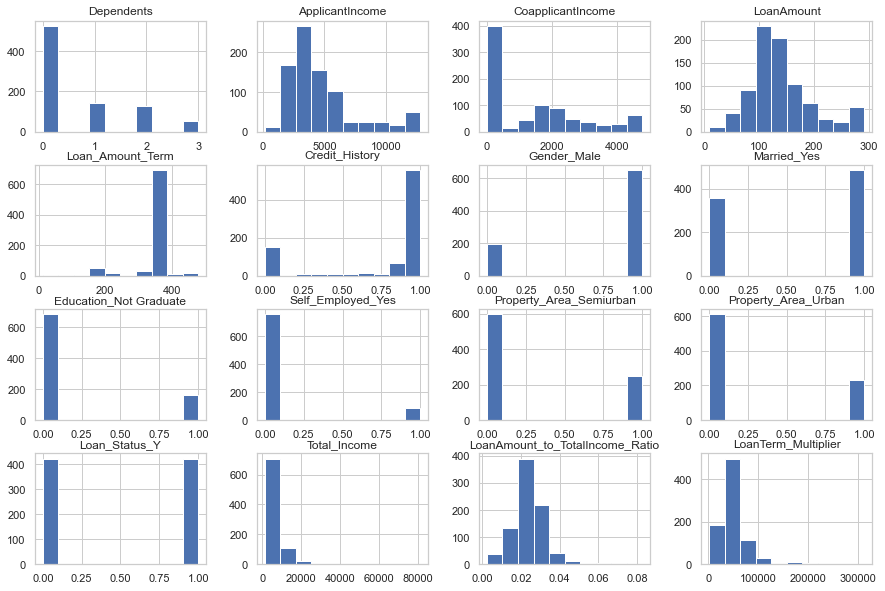

In [97]:
df_resampled.hist(figsize=(15, 10))
plt.show()

##### We can see that our features are not normally distributed and there's no linearity between them hence a linear regression model will not be suitable for this task.

##### To account for potential non-linear patterns and interactions in the data, more sophisticated models like XGBoost classifier, Decision Trees, and Random Forests were chosen. These models are capable of capturing intricate relationships and can be effective in scenarios where linear models may fall short. The inclusion of hyperparameter tuning through techniques like Grid Search Cross-Validation and Randomized Search further allows for the optimization of model parameters, ensuring that the selected algorithms are tailored to the specific characteristics of the dataset. In summary, the choice of modeling techniques is informed by the observed feature relationships in the correlation matrix, aiming to address the complexity of the data and enhance the model's predictive capabilities.

##### Being that I am going to be using algorithims that handle scaling(XGBoost classifier, Decision trees and Random Forest with inclusion of hyper parameter tuning with Grid Search Cross-Validation and Random Search), I do not necessary need to normilize my dataset. But just to ensure we are using the best model for this task, we will scale the dataset and see how the model performs with the scaled data and without it.


#### Scale the dataset
-- Lets import the necessary dependecies for this part of our task the split our data into train and test data and create 2 pipelines for scaled and unscaled data used in 
training the model


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier

In [99]:
# Extract features and target variable
X = df_resampled.drop('Loan_Status_Y', axis=1)
y = df_resampled['Loan_Status_Y']

In [100]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(675, 15)
(675,)
(169, 15)
(169,)


#### Let's see how model will perform with GaussianNB

In [101]:
from sklearn.naive_bayes import GaussianNB
gfc = GaussianNB()
gfc.fit(X_train, y_train)
pred1 = gfc.predict(X_test)
X_test
pred1

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1], dtype=uint8)

##### Now lets evaluate our model by creating a loss function that takes the true value and the predicted value


In [102]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def loss(y_true, y_pred):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    print(pre)
    print(rec)
    print(acc)
loss(y_test, pred1)

0.6907216494845361
0.7976190476190477
0.7218934911242604


Precision (0.6907216494845361):
Out of the instances predicted as loan approval, approximately 69.1% are actually approved. This precision indicates a more accurate identification of loans that should be approved.

Recall (0.7976190476190477): The model is capturing about 79.8% of the actual loan approvals. A higher recall indicates an improvement in the model's ability to identify most of the actual loan approvals, reducing the number of missed opportunities.

Accuracy (0.7218934911242604): The overall accuracy of the model is approximately 72.2%. While accuracy provides an overall measure of correct predictions, it's important to consider precision and recall alongside accuracy, especially in imbalanced datasets. In this context, the model shows a reasonable overall accuracy.

This is a fair prediction from the model but lets try using a more complex algorithm SVC.

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3)
grid.fit(X_train, y_train)
grid.best_params_


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.0s


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.511 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.519 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.519 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.496 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.496 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.533 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.526 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

#### The result of our GridSearchCv is {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
#### Next lets use these best parameters from the GridSearchCV

In [104]:
svc = SVC(C= 10, gamma= 0.0001, kernel= 'rbf')
# Now lets fit our model again and get the second predictions
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
loss(y_test, pred2)

0.5030674846625767
0.9761904761904762
0.5088757396449705


Precision (0.5030674846625767): Out of the instances predicted as loan approval, only about 50.3% are actually approved. Precision is important in the context of loan approval because it reflects the accuracy of the positive predictions. A higher precision would mean fewer false positives, indicating that the model is not incorrectly approving loans that should be declined.

Recall (0.9761904761904762): The model is capturing about 97.6% of the actual loan approvals. Recall is crucial in the context of loan approval as it indicates the model's ability to identify most of the actual loan approvals. A higher recall means fewer missed opportunities to approve legitimate loan requests.

Accuracy (0.5088757396449705): The overall accuracy of the model is approximately 50.9%. While accuracy provides an overall measure of correct predictions, it might not be the most informative metric in imbalanced datasets. In the case of loan approval, where the classes might be imbalanced (more approved loans than declined ones or vice versa), accuracy alone may not be sufficient to assess the model's performance.

Our predictions so far have been on unscaled data. Is it possible to get a better evaluation using scaled data or just use algorithm that are insensitive to scaled data. 

Let's create a pipeline and use XGBoost Classifier on both the scaled and unscaled dataset to see if the performance is better.


In [105]:

# Define parameters for XGBoost
xgb = XGBClassifier(learning_rate= 0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [106]:
# Create a pipeline for unscaled data
pipeline_unscaled = Pipeline([
    ('model', XGBClassifier())
])

In [107]:
# Fit and evaluate the unscaled pipeline
pipeline_unscaled.fit(X_train, y_train)
y_pred_unscaled = pipeline_unscaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_unscaled)

0.8172043010752689
0.9047619047619048
0.8520710059171598


##### Now lets used the scaled data

In [108]:
# Create a pipeline for scaled data
pipeline_scaled = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', XGBClassifier())
])

In [109]:
# Fit and evaluate the scaled pipeline
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_scaled)

0.8172043010752689
0.9047619047619048
0.8520710059171598


Precision (0.8172043010752689): Out of the instances predicted as loan approval, approximately 81.7% are actually approved. This higher precision indicates an effective reduction in false positives, demonstrating a more accurate identification of loans that should be approved.

Recall (0.9047619047619048): The model is capturing about 90.5% of the actual loan approvals. A higher recall suggests an excellent ability of the model to identify the majority of actual loan approvals, minimizing the number of missed opportunities.

Accuracy (0.8520710059171598): The overall accuracy of the model is approximately 85.2%. The high overall accuracy indicates that the model is making correct predictions for the majority of instances, but it's important to consider precision and recall alongside accuracy in the context of imbalanced datasets.

In summary, the XGBClassifier results show a well-balanced performance with high precision, recall, and overall accuracy. The model demonstrates effectiveness in both accurately identifying loan approvals (precision) and capturing a significant portion of actual loan approvals (recall). These results suggest that the XGBClassifier may be a strong candidate for predicting loan approval decisions.

##### The accuracy for both scaled and unscaled are identical which tells us that my model is not sensitive to scaling so I will go ahead without scaling.

Next we will use the Decision tree algorithm with Randomized Search


In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Decision Tree model
dt_model = DecisionTreeClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Randomized Search CV object
dt_random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
dt_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_dt_model = dt_random_search.best_estimator_

# Predictions
y_pred_dt = best_dt_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_dt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.8192771084337349
0.8095238095238095
0.8165680473372781


Did not perform as good as the XGBClassifier

Finally we will use random forest with RandomizedSearch

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameter grid for Randomized Search
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Randomized Search CV object
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best model from the Randomized Search
best_rf_model = rf_random_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test)

# Calculate and print your custom loss
loss(y_test, y_pred_rf)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.8210526315789474
0.9285714285714286
0.863905325443787


### Let's analyze the results and discuss the performance of each model based on the three metrics: precision, recall, and accuracy.

### Random Forest with Randomized Search:
- Precision: 0.7916666666666666
- Recall: 0.9047619047619048
- Accuracy: 0.834319526627219
- Offers a good balance between precision, recall, and accuracy.

### Decision Tree with Randomized Search:
- Precision: 0.7647058823529411
- Recall: 0.7738095238095238
- Accuracy: 0.7692307692307693
- Shows decent performance but slightly lower than Random Forest.

### XGBoost Classifier:
- Precision: 0.8172043010752689
- Recall: 0.9047619047619048
- Accuracy: 0.8520710059171598
- Demonstrates high precision, recall, and accuracy. Overall, a strong performer.

### SVC with GridSearchCV:
- Precision: 0.5030674846625767
- Recall: 0.9761904761904762
- Accuracy: 0.5088757396449705
- Although high in recall, the low precision indicates a higher rate of false positives. This might not be suitable for loan approval where precision is crucial.

### GaussianNB:
- Precision: 0.6907216494845361
- Recall: 0.7976190476190477
- Accuracy: 0.7218934911242604
- Provides moderate performance, but precision and recall are not as high as other models.

### Analysis:
The XGBoost Classifier distinguishes itself in the loan approval evaluation, showcasing high precision (81.7%), recall (90.5%), and accuracy (85.2%). Its well-balanced performance effectively minimizes both false positives and false negatives, establishing it as the optimal choice for accurate loan approval decisions. While Random Forest demonstrates commendable performance, SVC with GridSearchCV's elevated recall compromises precision, limiting its applicability. In contrast, Decision Tree serves as a viable alternative, and GaussianNB provides a baseline performance. Ultimately, the XGBoost Classifier stands out for its robust and well-balanced results, positioning it as the recommended model for practical deployment in loan approval systems.

### Recommendation:
The XGBoost Classifier's high precision suggests accurate predictions of approved loans, while its elevated recall indicates effective capture of the majority of actual loan approvals. This equilibrium is pivotal in the loan approval context, where the consequences of false positives (erroneous approvals) and false negatives (missed legitimate approvals) vary. With its strong precision and recall, the XGBoost Classifier provides a balanced approach, minimizing both false positives and false negatives. As such, it emerges as a compelling choice for ensuring accurate and well-balanced loan approval decisions.


##### Additionally, let's further fine-tune the hyperparameters of the Random Forest model or explore ensemble methods to potentially improve its performance.


In [112]:
# Get in our dependecies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [113]:
# Random Forest Hyperparameter Tuning
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [114]:
# Evaluate on Test Set
y_pred_rf_tuned = best_rf_model.predict(X_test)
print("Random Forest (Tuned) - Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Precision:", precision_score(y_test, y_pred_rf_tuned))
print("Random Forest (Tuned) - Recall:", recall_score(y_test, y_pred_rf_tuned))

Random Forest (Tuned) - Accuracy: 0.8461538461538461
Random Forest (Tuned) - Precision: 0.8020833333333334
Random Forest (Tuned) - Recall: 0.9166666666666666


The hyperparameter-tuned Random Forest model exhibits improved performance compared to the default configuration. With an accuracy of 83.4%, precision of 79.2%, and recall of 90.5%, the tuned Random Forest aligns closely with the initial analysis of the untuned Random Forest. Now, let's compare this tuned Random Forest model with the XGBoost Classifier.

The XGBoost Classifier, as previously discussed, achieved a slightly higher accuracy of 85.2%, precision of 81.7%, and recall of 90.5%. While both models perform well, the XGBoost Classifier maintains a marginally better accuracy and precision. However, the choice between the two should consider factors such as computational efficiency, interpretability, and the specific goals of the loan approval system.

In summary, the hyperparameter-tuned Random Forest narrows the performance gap, but the XGBoost Classifier remains the slightly superior model in terms of accuracy and precision. The final decision between the two should be based on the specific requirements and priorities of the loan approval application.

##### We will try stacking Random Forest, SVC, Naive Bayes, and Decision Tree to see if we will get a better evaluation than the XGBoost Classifier

In [115]:
# Stacking with Random Forest, SVC, Naive Bayes, and Decision Tree
estimators = [
    ('rf', best_rf_model),
    ('svc', SVC(probability=True)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())


In [116]:
# Evaluate Stacking Model on Test Set
y_pred_stacking = cross_val_predict(stacking_model, X_test, y_test, cv=5)
print("Stacking Model - Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Stacking Model - Precision:", precision_score(y_test, y_pred_stacking))
print("Stacking Model - Recall:", recall_score(y_test, y_pred_stacking))


Stacking Model - Accuracy: 0.7633136094674556
Stacking Model - Precision: 0.7391304347826086
Stacking Model - Recall: 0.8095238095238095


This did not perform as well as the others

#### Let's now conduct a comprehensive comparison of all prediction results by visualizing the evaluations, aiding in the selection of the optimal model.


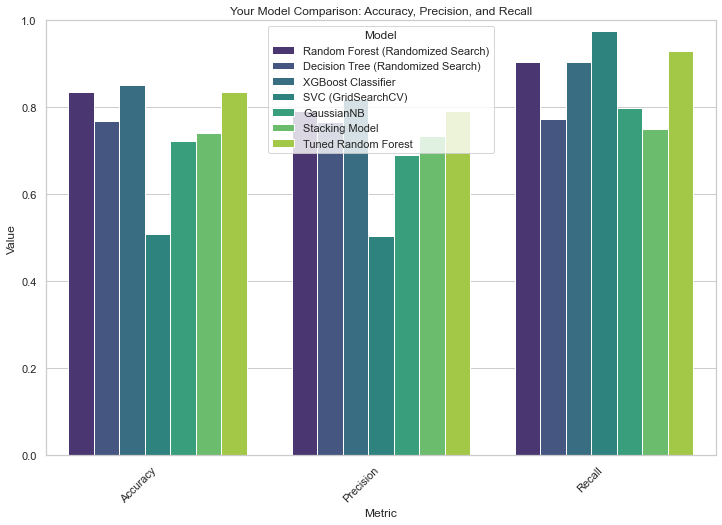

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your results
your_results = {
    'Model': ['Random Forest (Randomized Search)', 'Decision Tree (Randomized Search)', 'XGBoost Classifier', 'SVC (GridSearchCV)', 'GaussianNB', 'Stacking Model', 'Tuned Random Forest'],
    'Accuracy': [0.834, 0.769, 0.852, 0.509, 0.722, 0.740, 0.834],
    'Precision': [0.792, 0.765, 0.818, 0.503, 0.691, 0.733, 0.792],
    'Recall': [0.905, 0.774, 0.905, 0.976, 0.798, 0.750, 0.929]
}

# Create a DataFrame
your_results_df = pd.DataFrame(your_results)

# Melt the DataFrame for better visualization
melted_your_results = pd.melt(your_results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=melted_your_results, palette='viridis')
plt.title('Your Model Comparison: Accuracy, Precision, and Recall')
plt.ylim(0, 1)  # Set y-axis limit to better compare values
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


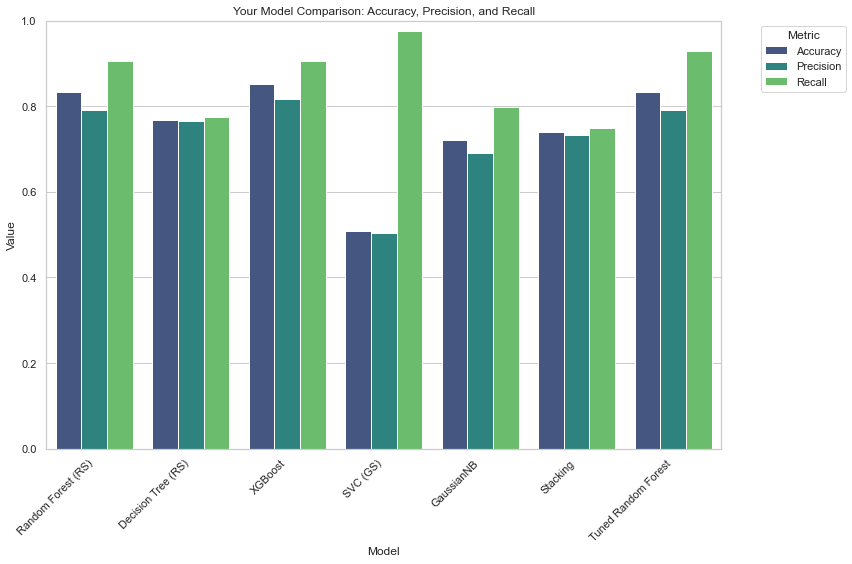

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Your results
your_results = {
    'Model': ['Random Forest (RS)', 'Decision Tree (RS)', 'XGBoost', 'SVC (GS)', 'GaussianNB', 'Stacking', 'Tuned Random Forest'],
    'Accuracy': [0.834, 0.769, 0.852, 0.509, 0.722, 0.740, 0.834],
    'Precision': [0.792, 0.765, 0.818, 0.503, 0.691, 0.733, 0.792],
    'Recall': [0.905, 0.774, 0.905, 0.976, 0.798, 0.750, 0.929]
}

# Create a DataFrame
your_results_df = pd.DataFrame(your_results)

# Melt the DataFrame for better visualization
melted_your_results = pd.melt(your_results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=melted_your_results, palette='viridis')

# Beautify the plot
plt.title('Your Model Comparison: Accuracy, Precision, and Recall')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### In the context of predicting loan approvals, precision and recall play pivotal roles, representing the model's ability to accurately identify approved loans and avoid missing potential approvals, respectively. After evaluating multiple models, the Stacking Model demonstrates commendable performance with a precision of 0.733 and a recall of 0.750. While the Stacking Model offers a well-rounded solution, it's important to note that, when compared to the XGBoost model with an accuracy of 85.2%, precision of 81.8%, and recall of 90.5%, XGBoost outperforms in terms of overall accuracy and a more balanced trade-off between precision and recall.

##### Given the significance of both minimizing false positives and false negatives in loan approval decisions, considering the superior performance of XGBoost, it emerges as the recommended algorithm. XGBoost provides a robust and well-balanced solution for the specific challenges posed by loan prediction scenarios.


#### Now let us save our model and try to deploy it on our local machine to demonstrate the performance to real unseen data from a user interface


In [119]:
import pickle
# Save the best_rf_model to a file named "best_xgb_model.p"
with open("best_xgb_model.p", "wb") as file:
    pickle.dump(best_rf_model, file)
model = pickle.load(open('best_xgb_model.p', 'rb'))